# Capstone Team 8 Face Identification & Emotion Recognition

## Module Installation

In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 798.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=7dc6083cd33ebeea9afeef3f09baa61dc90c0b57ee94899a7e9a798d0597cfb2
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [ ]:
!pip install google-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.7 MB/s eta 0:00:00


In [ ]:
from deepface import DeepFace
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd

24-06-13 16:18:57 - Directory /root/.deepface created
24-06-13 16:18:57 - Directory /root/.deepface/weights created


In [ ]:
import os
from google.colab import files

## Face Identification & Emotion Detection

Create directories for source photos and on-the-spot login photos

In [ ]:
# define directory path for storing source photos
source_photo_directory = f"/content/source"

# check if directory exists
if not os.path.exists(source_photo_directory):
  # if no, create the directory
  os.makedirs(source_photo_directory)

# define directory path for storing login photos
login_photo_directory = f"/content/login"

# check if directory exists
if not os.path.exists(login_photo_directory):
  # if no, create the directory
  os.makedirs(login_photo_directory)

In [ ]:
def upload_photo(directory):
    """
    Uploads photo files to the specified directory.

    Parameters:
        directory (str): The directory path where the photos will be uploaded.

    Returns:
        str: The path of the uploaded photo file.
    """
    uploaded_photos = files.upload()
    for filename in uploaded_photos.keys():
        path = os.path.join(directory, filename)
        with open(path, 'wb') as f:
            f.write(uploaded_photos[filename])

        # display the photo to see if it is correctly loaded
        image = cv2.imread(path)
        if image is not None:
            print("Uploaded Image:")
            # only show the extracted faces from uploads, not the entire image
            image = DeepFace.extract_faces(image)[0]["face"]
            # resize the image to 224x224 pixels so that it is easier for display
            image = cv2.resize(image, (224, 224))
            plt.imshow(image)
            plt.axis('off')
            plt.show()
        else:
            print("Failed to load image for display.")
        return path

def rename_photo(original_path, new_name):
    """
    Renames a photo file with a new name.

    Parameters:
        original_path (str): The original path of the photo file to be renamed.
        new_name (str): The new name for the photo file.

    Returns:
        str: The path of the renamed photo file.
    """
    new_filename = new_name.replace(" ", "_") + os.path.splitext(original_path)[1]
    new_path = os.path.join(os.path.dirname(original_path), new_filename)
    os.rename(original_path, new_path)
    return new_path

In [ ]:
def find_identity(photo_path, database_path):
    """
    Finds the identity of a person in a photo using facial recognition.

    Parameters:
        photo_path (str): The file path of the photo containing the person's face.
        database_path (str): The file path of the database containing reference face embeddings.

    Returns:
        str or None: The identity of the person if found in the database, or None if not found.
    """
    try:
      # switch face identification models by changing model_name
      df = DeepFace.find(img_path=photo_path, db_path=database_path, model_name='VGG-Face')
      if len(df) > 0:
          identity = df[0].loc[0,'identity']
          return identity
      else:
          return None
    except Exception as e:
      print(f"Error during facial recognition: {e}")
      return None

In [ ]:
def extract_username_from_path(path):
    """
    Extracts the username from a file path.

    Parameters:
        path (str): The file path from which to extract the username.

    Returns:
        str: The extracted username.
    """
    filename = os.path.basename(path)
    username = os.path.splitext(filename)[0].replace("_", " ")
    return username

In [ ]:
def analyze_emotion(photo_path):
    """
    Analyzes the dominant emotion depicted in a photo.

    Parameters:
        photo_path (str): The file path of the photo to be analyzed.

    Returns:
        str: The dominant emotion depicted in the photo.
    """
    predictions = DeepFace.analyze(img_path=photo_path)
    # DeepFace recognizes multiple faces within the same photo
    # DeepFace.analyze returns a list of dictionaries and since we only
    # have one person in each photo we only need predictions[0]
    emotion = predictions[0]['dominant_emotion']
    return emotion

## User Sign-up / Log-in

In [ ]:
sign_up_login_choice = int(input("Please type 1 to sign up for new user, 2 to login: "))

Please type 1 to sign up for new user, 2 to login: 2


Please upload a photo of yours to log in:


Saving jt3.jpg to jt3.jpg
Uploaded Image:


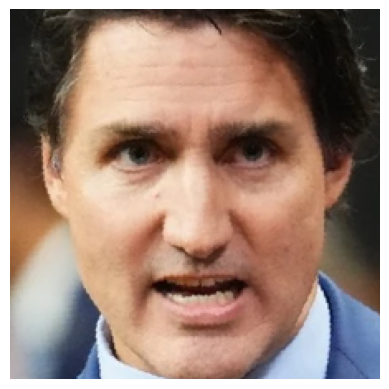

24-06-13 16:57:22 - Searching /content/login/jt3.jpg in 4 length datastore
24-06-13 16:57:25 - find function duration 2.9489407539367676 seconds


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]


Login Successful, welcome back Justin Trudeau! You seem to be feeling angry.


In [ ]:
if sign_up_login_choice == 1:
    user_name = input("Enter your name: ")
    print("Please upload a photo of yours to complete the sign up process:")
    # upload the photo
    photo_path = upload_photo(source_photo_directory)
    # rename and align the uploaded photo name with username
    new_photo_path = rename_photo(photo_path, user_name)
    print(f"Welcome {user_name}, your photo has been saved at {new_photo_path}")

elif sign_up_login_choice == 2:
    print("Please upload a photo of yours to log in:")
    # upload the photo
    photo_path = upload_photo(login_photo_directory)
    # find the identity of the person in the photo
    matched_photo = find_identity(photo_path, source_photo_directory)

    # if the user is found, analyze the emotion of the photo
    if matched_photo:
      username = extract_username_from_path(matched_photo)
      emotion = analyze_emotion(photo_path)
      print(f"\nLogin Successful, welcome back {username}! You seem to be feeling {emotion}.")

    # if no user found, ask the user to sign up first
    else:
      print("No matching user found. Please ensure your photo is clear or sign up if you haven't yet.")

else:
    print("Invalid input")